In [17]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
# create a state 
class QuadState(TypedDict):

    a:int
    b:int
    c:int
    
    equation:str
    discriminant:float
    result:str


In [18]:
def show_equation(state:QuadState):

    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"

    return {"equation":equation}

def calculate_discriminant(state:QuadState):

    discriminant = state['b']**2 - (4*state['a']*state['c'])

    return {"discriminant":discriminant}

def real_roots(state:QuadState):

    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

def repeated_roots(state:QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}

def no_real_roots(state:QuadState):

    result = f'No real roots'

    return {'result': result}

def check_condition(state:QuadState) -> Literal ["real_roots", "repeated_roots", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"


In [19]:
# create a graph

graph = StateGraph(QuadState)

# create nodes 

graph.add_node("show_euqation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

# create edges 

graph.add_edge(START, "show_euqation")
graph.add_edge("show_euqation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_condition)

graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)



# compile the graph

workflow = graph.compile()


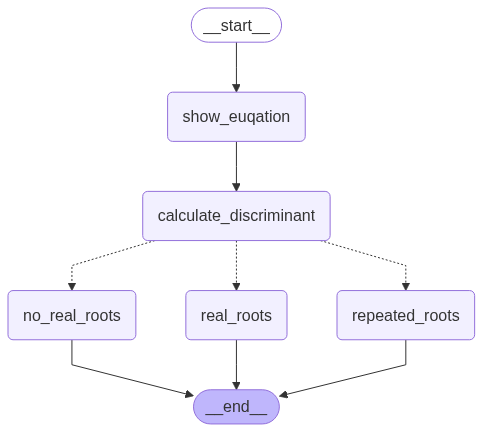

In [20]:
workflow

In [21]:
initial_state = {
    'a' : 3,
    'b' : -4,
    'c' : 8
}

In [22]:
workflow.invoke(initial_state)

{'a': 3,
 'b': -4,
 'c': 8,
 'equation': '3x^2 + -4x + 8 = 0',
 'discriminant': -80,
 'result': 'No real roots'}